# Assignment: Natural Language Processing (Classification)


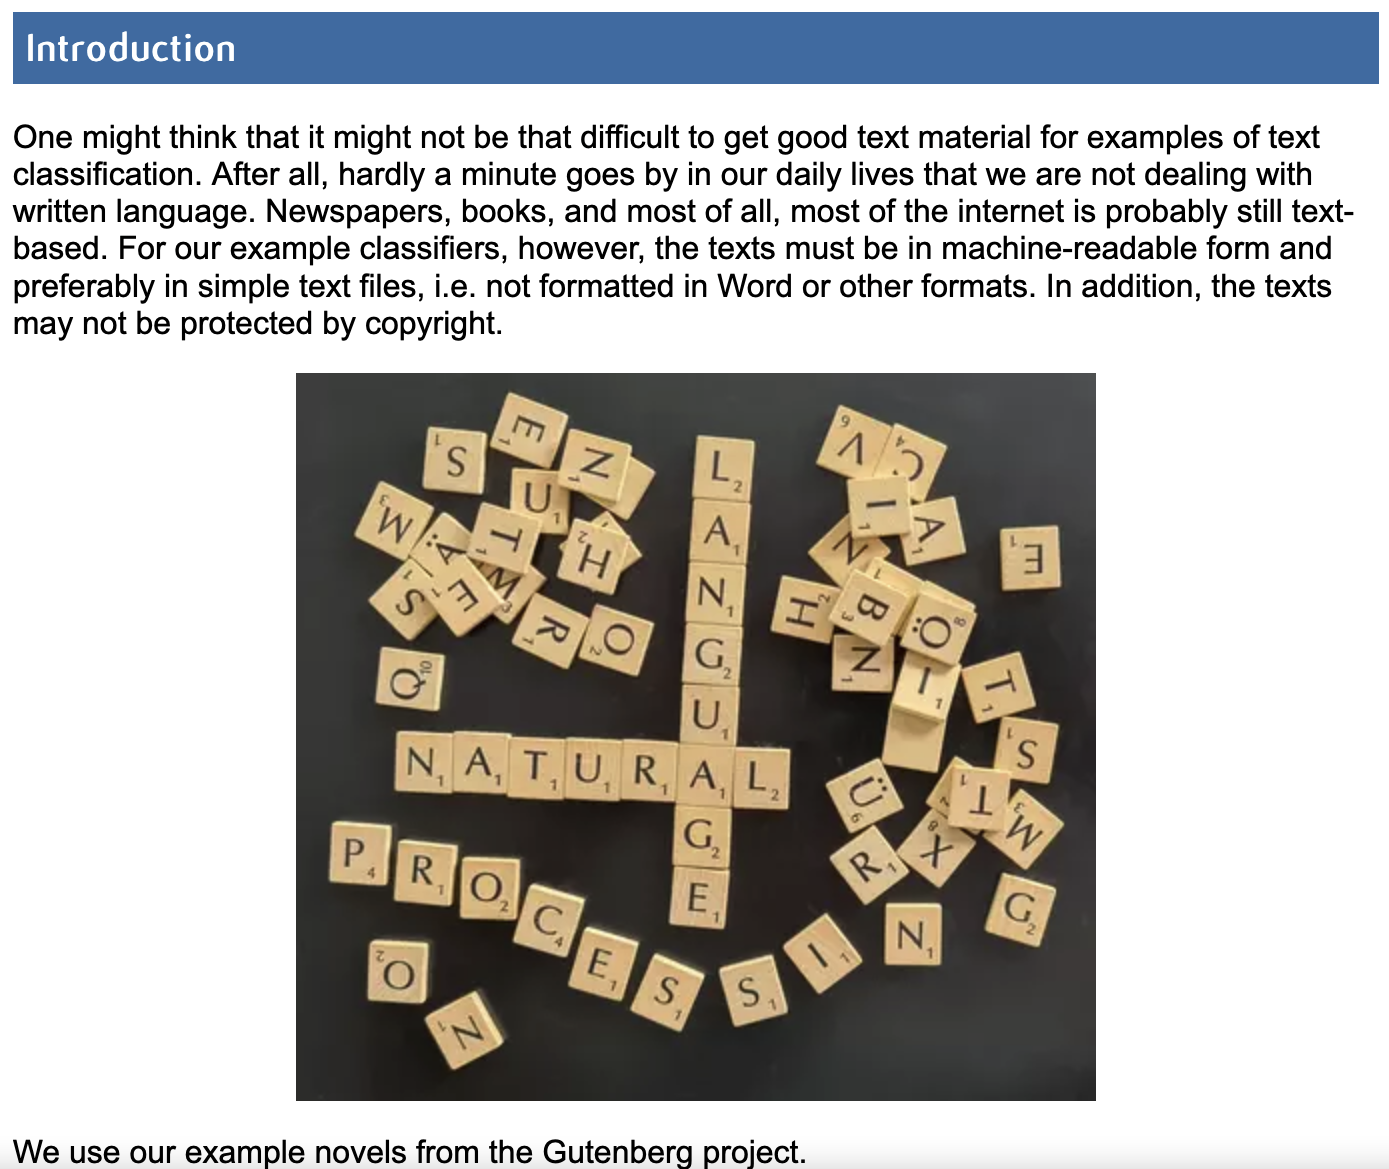

The first task consists in training a classifier which can predict the author of a paragraph from a novel.

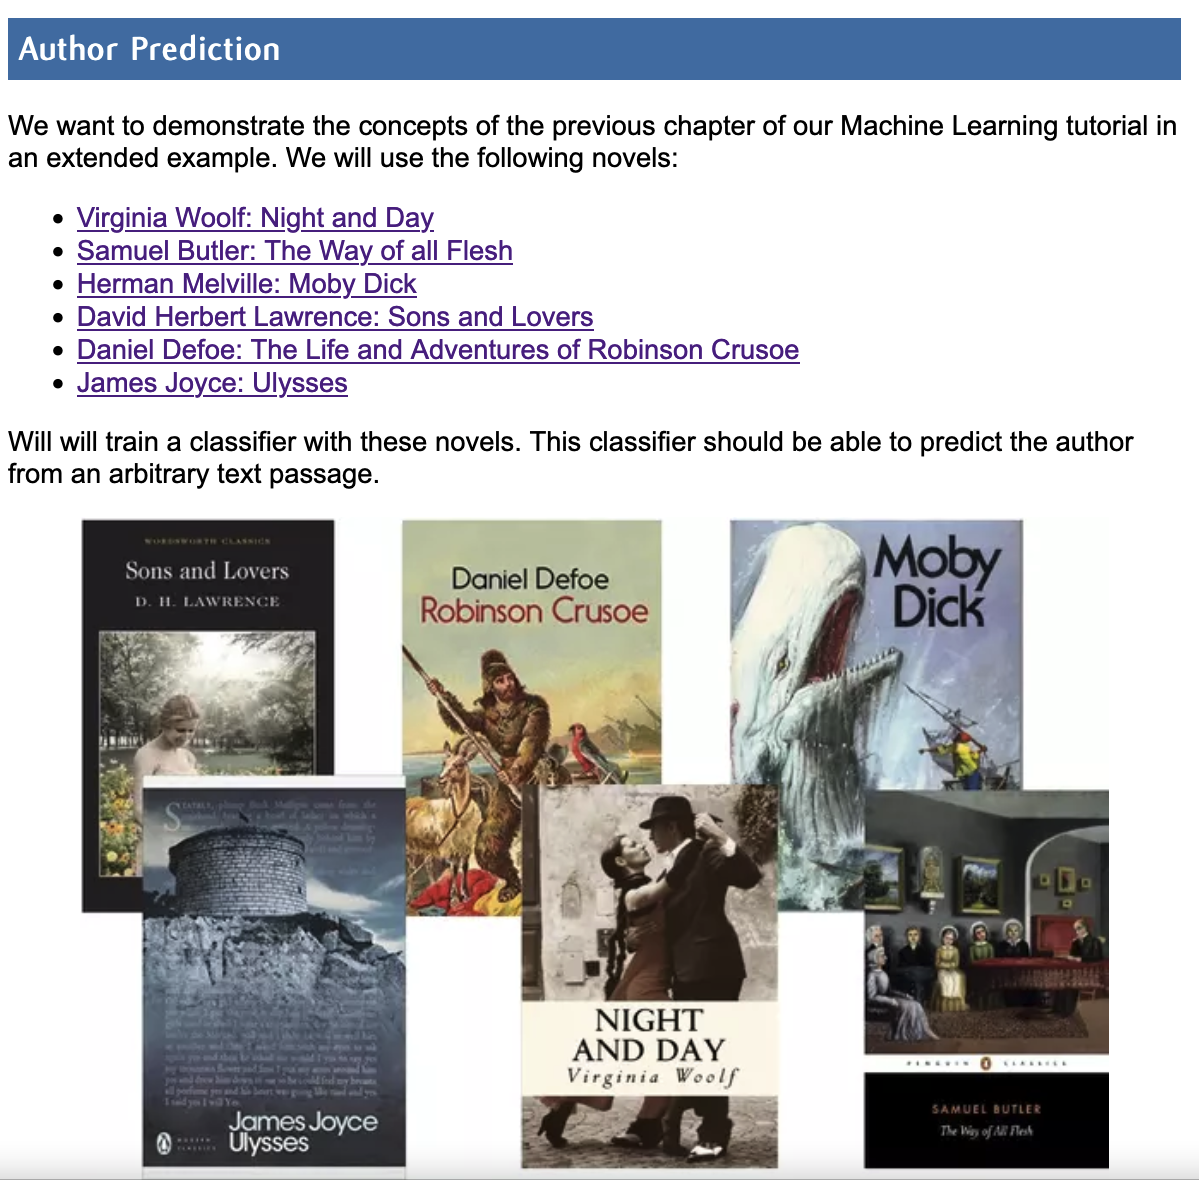

In [74]:
def text2paragraphs(filename, min_size=1):
    """ A text contained in the file 'filename' will be read 
    and chopped into paragraphs.
    Paragraphs with a string length less than min_size will be ignored.
    A list of paragraph strings will be returned"""
    
    txt = open(filename, encoding="utf8").read()
    paragraphs = [para for para in txt.split("\n\n") if len(para) > min_size]
    return paragraphs

In [75]:
# split file text into paragraphs
wolf_paragraphs = text2paragraphs("books/to_the_lighthouse_woolf.txt", min_size=100)

#loop through paragraphs from 10-th to 13-th
for i in range(10, 14):
    print()
    print(wolf_paragraphs[i])


“I should think there would be no one to talk to in Manchester,” she
replied at random. Mr. Fortescue had been observing her for a moment or
two, as novelists are inclined to observe, and at this remark he smiled,
and made it the text for a little further speculation.

“In spite of a slight tendency to exaggeration, Katharine decidedly
hits the mark,” he said, and lying back in his chair, with his opaque
contemplative eyes fixed on the ceiling, and the tips of his fingers
pressed together, he depicted, first the horrors of the streets of
Manchester, and then the bare, immense moors on the outskirts of the
town, and then the scrubby little house in which the girl would live,
and then the professors and the miserable young students devoted to the
more strenuous works of our younger dramatists, who would visit her,
and how her appearance would change by degrees, and how she would fly to
London, and how Katharine would have to lead her about, as one leads an
eager dog on a chain, past row

In [76]:
#define list of labels
labels = ['Virginia Woolf', 'Samuel Butler', 'Herman Melville', 
          'David Herbert Lawrence', 'Daniel Defoe', 'James Joyce']

#define list of filenames
files = ['night_and_day_virginia_woolf.txt', 
         'the_way_of_all_flash_butler.txt',
         'moby_dick_melville.txt', 
         'sons_and_lovers_lawrence.txt',
         'robinson_crusoe_defoe.txt', 
         'james_joyce_ulysses.txt']

#path to folder containing text files
path = "books/"

#iterating through text files, split text into paragraphs, generate target labels for each paragraphs
data = []
targets = []
counter = 0  # counter va da 0 ... a ... 5
for fname in files:
    paras = text2paragraphs(path + fname, min_size=150)
    data.extend(paras)
    targets += [counter] * len(paras)  # esempio: x = [0]*7 = [0, 0, 0, 0, 0, 0, 0]
    counter += 1


<span style="color:yellow">**Comment**</span>.

The chunk above is used to create two vectors:
- data: containing chopped parts (paragraphs) of each book;
- targets: whose length is the same as *data* and whose values range from 0 to 5, so that:
    - 0: Virginia Woolf
    - 1: Samuel Butler
    - 2: Herman Melville
    - 3: David Herbert Lawrence
    - 4: Daniel Defoe
    - 5: James Joyce

In [77]:
#total number of paragraphs
len(data)

9182

In [78]:
#total number of target labels 
len(targets)

9182

In [79]:
# show an example
data[0]

'This eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org'

In [80]:
# cell is useless, because train_test_split will do the shuffling!

#import random library
import random

#create a list of couples (data, targets)
data_targets = list(zip(data, targets))
#show the first element
print(data_targets[0],'\n')

# create random permuation on list:
data_targets = random.sample(data_targets, len(data_targets))
#show the new first element
print(data_targets[0],'\n')

#extract data and targets lists after shuffling
data, targets = list(zip(*data_targets))
print('data: ', data[0], '\n', 'target: ', targets[0])

('This eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org', 0) 

('I protested my innocence of these things. I saw that under the mask of\nthese half humorous innuendoes, this old seaman, as an insulated\nQuakerish Nantucketer, was full of his insular prejudices, and rather\ndistrustful of all aliens, unless they hailed from Cape Cod or the\nVineyard.', 2) 

data:  I protested my innocence of these things. I saw that under the mask of
these half humorous innuendoes, this old seaman, as an insulated
Quakerish Nantucketer, was full of his insular prejudices, and rather
distrustful of all aliens, unless they hailed from Cape Cod or the
Vineyard. 
 target:  2


<span style="color:yellow">**Comment**</span>.

The code above is for shuffling the data-targets couples. The same results can be obtained using the train_test_split method from the scikit_learn library (see below)  

In [81]:
# Split into train and test sets (together with their corresponding targets):
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)


In [82]:
print(train_data[0], '\n\n', test_data[0], '\n\n', train_targets[0], '\n\n', test_targets[0])

Here, then, was this grey-headed, ungodly old man, chasing with curses
a Job's whale round the world, at the head of a crew, too, chiefly made
up of mongrel renegades, and castaways, and cannibals—morally enfeebled
also, by the incompetence of mere unaided virtue or right-mindedness in
Starbuck, the invulnerable jollity of indifference and recklessness in
Stubb, and the pervading mediocrity in Flask. Such a crew, so
officered, seemed specially picked and packed by some infernal fatality
to help him to his monomaniac revenge. How it was that they so
aboundingly responded to the old man's ire—by what evil magic their
souls were possessed, that at times his hate seemed almost theirs; the
White Whale as much their insufferable foe as his; how all this came to
be—what the White Whale was to them, or how to their unconscious
understandings, also, in some dim, unsuspected way, he might have
seemed the gliding great demon of the seas of life,—all this to
explain, would be to dive deeper than I

<span style="color:yellow">**Comment**</span>.

Through the function **train_test_split** the initial dataset made up of data-target pairs is separated into train (80%) and test (20%) set randomly.

In [83]:
# show number of elements for each train and test set
len(train_data), len(test_data), len(train_targets), len(test_targets)

(7345, 1837, 7345, 1837)

In [84]:
# We create a Naive Bayes classifier:
# Feature extraction: https://scikit-learn.org/stable/modules/feature_extraction.html

#import libraries
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#initialize Count Vectorizer
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
#fit and transform train data 
vectors = vectorizer.fit_transform(train_data)

# creating a classifier
classifier = MultinomialNB(alpha=.01)

#train classifier using train-set
classifier.fit(vectors, train_targets)

#transform test_data with vectorizer
vectors_test = vectorizer.transform(test_data)

#make predictions using trained classifier
predictions = classifier.predict(vectors_test)

#evaluate model prediction
accuracy_score = metrics.accuracy_score(test_targets, 
                                        predictions)
f1_score = metrics.f1_score(test_targets, 
                            predictions, 
                            average='macro')

print("accuracy score: ", accuracy_score)
print("F1-score: ", f1_score)

accuracy score:  0.9063690800217746
F1-score:  0.9043053868758797


<span style="color:yellow">**Comment**</span>.

- **CountVectorizer** counts the number of words in the document. It converts a collection of text documents to a matrix where the elements are the number of occurences of each word in the document.
It gives equal weightage to all the words, i.e., a word weight is equal to 1 if it is present in that document, otherwise it is 0.
After applying **CountVectorizer**, we obtain a sparse matrix where the rows are the paragraphs and the columns are the unique words among all the books (stop-word excluded).

- **Stop Words**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that does not bring any value to the NLP, hence we want to remove these elements from the process. Scikit-learn has the package ENGLISH_STOP_WORDS, containing a set of stop English words.


After applying the CountVectorizer, the vector we obtain can be used to apply MutlinomialNB.

**What is MultinomialNB**

Multinomial Naïve Bayes: implements the naive Bayes algorithm for multinomially distributed data, where the data are typically represented as word vector counts. The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


To evaluate the results of the classification we used the following scores:

- **Accuracy:** it measures how many paragraphs were predicted correctly out of all of the paragraphs in the corpus. 
$$ A = TP + TN / (TP + FP + TN + FN) $$ 
where TP: True Positive, TN: True Negative, FP: False Positive, FN: False Negative.

- **Recall:** measures how many texts were predicted correctly as belonging to a given category out of all the texts that should have been predicted as belonging to the category. We also know that the more data we feed our classifiers with, the better recall will be. 
$$ R = TP / (TP + FN) $$

- **Precision:** measures how many docs are predicted correctly as belonging to a given category out of all of the docs that are predicted (correctly and incorrectly) as belonging to the category: 
$$ P = TP / (TP + FP). $$

- **F1-score:** The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: 

$$ F1 = 2 * (precision * recall) / (precision + recall). $$


<span style="color:yellow">**New code**</span>.

In the code snippet below we added a confusion matrix plot in order to show the model performance.
- it is observed how the test examples are not uniformly distributed among the 6 classes
- major errors are made in predicting class 3

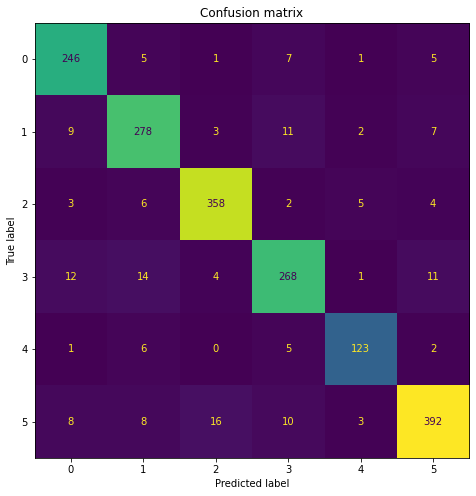

In [85]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm=metrics.confusion_matrix(test_targets,predictions)
plt.rcParams["figure.figsize"] = (8,8)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(colorbar=False)
plt.title("Confusion matrix")
plt.show()

In [86]:
print("The shape of vectors is: ", vectors.shape)  

print(vectors[0]) #vectors are element in the format (sentence_index, feature_index) count.

The shape of vectors is:  (7345, 35205)
  (0, 13964)	1
  (0, 14659)	1
  (0, 32791)	1
  (0, 21541)	2
  (0, 19134)	2
  (0, 5473)	1
  (0, 7899)	1
  (0, 17214)	1
  (0, 34361)	4
  (0, 26520)	1
  (0, 34887)	1
  (0, 14654)	1
  (0, 7594)	2
  (0, 5589)	1
  (0, 20250)	1
  (0, 25723)	1
  (0, 5120)	1
  (0, 4870)	1
  (0, 20342)	1
  (0, 10594)	1
  (0, 16096)	1
  (0, 19728)	1
  (0, 32444)	1
  (0, 33758)	1
  (0, 26211)	1
  :	:
  (0, 18023)	1
  (0, 27685)	1
  (0, 27864)	1
  (0, 20532)	1
  (0, 28967)	1
  (0, 23047)	1
  (0, 9456)	1
  (0, 11752)	1
  (0, 16927)	1
  (0, 1927)	1
  (0, 9678)	1
  (0, 28348)	1
  (0, 31739)	1
  (0, 27632)	1
  (0, 29458)	1
  (0, 13209)	1
  (0, 537)	1
  (0, 31421)	1
  (0, 23254)	1
  (0, 26669)	1
  (0, 10533)	1
  (0, 20824)	1
  (0, 4372)	1
  (0, 8182)	1
  (0, 15745)	1


In [87]:
# This code is not used in the following steps, it can be commented

#from sklearn.feature_extraction import DictVectorizer
#vectors = vectorizer.fit_transform(train_data)

In [88]:
#show true_label-prediction pairs
report = zip(test_targets, predictions)
print(list(report)[0:10])

[(2, 2), (4, 4), (5, 2), (0, 0), (2, 2), (3, 3), (5, 1), (5, 5), (0, 0), (5, 5)]


<span style="color:yellow">**Comment**</span>.

**report** above contains a list of couples (true author, predicted author) for each paragraph in the test dataset.
Where two index are equal the prediction is correct.

In [89]:
# We will test this classifier now with two different books of Virginia Woolf.

#split Virginia Woolf text file into paragraphs
paras = text2paragraphs(path + "the_voyage_out_virginia_woolf.txt", min_size=250)
#paras = text2paragraphs(path + "to_the_lighthouse_woolf.txt", min_size=250)

#we limited our attention to paragraphs from 100-th to 500-th (400 in total)
first_para, last_para = 100, 500

#define target labels list: all the paragraphs have label 0 (Virginia Woolf)
targets = [0] * (last_para - first_para)

#apply CountVectorizer to selected paragraphs
vectors_test = vectorizer.transform(paras[first_para: last_para])
#vectors_test = vectorizer.transform(["To be or not to be"])

#make predictions
predictions = classifier.predict(vectors_test)
print(predictions)

#evaluate model
accuracy_score = metrics.accuracy_score(targets, predictions)
precision_score = metrics.precision_score(targets, predictions, average='macro')
f1_score = metrics.f1_score(targets, 
                            predictions, 
                            average='macro')

print("accuracy score: ", accuracy_score)
print("precision score: ", accuracy_score)
print("F1-score: ", f1_score)

[5 0 0 5 0 1 0 0 2 5 0 0 1 0 0 0 0 0 1 0 1 0 0 5 0 5 0 1 0 0 0 0 5 2 2 5 0
 2 2 5 0 0 0 0 0 3 0 2 0 0 0 4 2 5 2 0 0 0 0 0 0 5 5 0 3 0 0 0 0 0 5 5 1 0
 0 0 1 0 0 2 2 0 0 2 2 0 5 3 2 5 1 0 0 0 0 5 0 0 5 0 5 3 5 5 0 5 5 5 5 0 5
 0 0 0 0 0 0 3 2 0 0 0 5 0 1 2 2 2 5 5 0 3 0 0 3 0 0 5 1 5 0 0 0 0 3 2 0 0
 0 0 1 0 5 5 5 1 1 1 3 0 0 0 0 0 0 5 0 1 0 0 0 0 5 5 5 0 2 0 0 0 0 0 0 0 0
 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 0 0 0 5 5 5 3 0 2 0 0 3 0 0 0 5 0
 0 5 5 0 0 0 0 0 0 0 0 0 0 2 0 0 5 3 5 1 0 5 0 0 0 0 5 0 1 0 0 0 0 0 0 1 3
 1 1 0 5 1 5 5 2 0 0 0 0 5 3 2 5 0 1 0 0 0 0 0 0 3 0 4 0 2 5 0 1 0 0 0 0 1
 1 0 0 5 5 0 5 0 0 0 0 5 3 3 0 0 0 3 3 0 0 0 1 3 0 0 0 0 0 0 3 0 0 5 0 0 0
 3 3 5 0 3 3 0 0 1 0 1 0 0 3 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 2 2 3 0 0
 0 1 0 0 0 5 0 0 0 0 0 0 0 1 3 0 0 0 0 0 1 5 0 0 0 0 0 0 0 0]
accuracy score:  0.6075
precision score:  0.6075
F1-score:  0.12597200622083984


<span style="color:yellow">**Comment**</span>.

The code applies the same vectorizer (*CountVectorizer*) and classifier (*MultinomialNB*) to a different test data (a different book by Virginia Woolf). 
This to evaluate the capability of the model to identify the correct author using a different dataset never seen before.

The indicators results show a poor performance of the model, given that **accuracy** and **F1-score** results are lower than the values obtained in the previous test.

In [90]:
report = zip(targets, predictions)
print(list(report))

[(0, 5), (0, 0), (0, 0), (0, 5), (0, 0), (0, 1), (0, 0), (0, 0), (0, 2), (0, 5), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 5), (0, 0), (0, 5), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 5), (0, 2), (0, 2), (0, 5), (0, 0), (0, 2), (0, 2), (0, 5), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 3), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (0, 4), (0, 2), (0, 5), (0, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 5), (0, 5), (0, 0), (0, 3), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 5), (0, 5), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 0), (0, 2), (0, 2), (0, 0), (0, 5), (0, 3), (0, 2), (0, 5), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 5), (0, 0), (0, 0), (0, 5), (0, 0), (0, 5), (0, 3), (0, 5), (0, 5), (0, 0), (0, 5), (0, 5), (0, 5), (0, 5), (0, 0), (0, 5), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 3), (0, 2), (0, 0), (0, 0), (0, 0), (0, 5), (0, 0), (0, 1),

<span style="color:yellow">**Comment**</span>.

As already mentioned, **report** contains a list of couples (true author, predicted author) for each paragraph in the test dataset.


In [91]:
#predict_proba: return probability estimates for the test vector.
predictions = classifier.predict_proba(vectors_test)
print(predictions)

[[1.39170154e-006 5.69432445e-004 3.87630182e-007 6.05835156e-007
  1.99453452e-015 9.99428182e-001]
 [9.97893225e-001 4.04581396e-005 6.15558321e-004 1.51010745e-011
  4.23547365e-015 1.45075874e-003]
 [9.57822090e-001 1.28004831e-010 6.52684863e-012 4.79815104e-010
  1.76274548e-015 4.21779095e-002]
 ...
 [9.99975012e-001 2.49875538e-005 2.24732089e-035 1.41488819e-026
  3.77543595e-042 1.03543276e-033]
 [9.99984004e-001 1.58884473e-005 5.72440036e-022 1.86791731e-030
  1.04324264e-052 1.07650127e-007]
 [1.00000000e+000 3.88300490e-059 3.05569592e-062 1.77176740e-092
  5.03916045e-114 2.07375420e-060]]


<span style="color:yellow">**Comment**</span>.

In the code snippet above, **predictions** returns the class probabilities for each data point. The method **predict_proba** accepts a single argument that corresponds to the data over which the probabilities will be computed and returns an array of lists containing the class probabilities for the input data points.

For each paragraph, the probabilities of belonging to each of the possible classes are returned.

In [92]:
# Let us have a look at the first 5 paragraphs which we have tested:
for i in range(0, 5):
    print('\n')
    print(predictions[i], '\n', paras[i+first_para])



[1.39170154e-06 5.69432445e-04 3.87630182e-07 6.05835156e-07
 1.99453452e-15 9.99428182e-01] 
 "That's the painful thing about pets," said Mr. Dalloway; "they die. The
first sorrow I can remember was for the death of a dormouse. I regret to
say that I sat upon it. Still, that didn't make one any the less sorry.
Here lies the duck that Samuel Johnson sat on, eh? I was big for my
age."


[9.97893225e-01 4.04581396e-05 6.15558321e-04 1.51010745e-11
 4.23547365e-15 1.45075874e-03] 
 "Please tell me--everything." That was what she wanted to say. He had
drawn apart one little chink and showed astonishing treasures. It seemed
to her incredible that a man like that should be willing to talk to her.
He had sisters and pets, and once lived in the country. She stirred her
tea round and round; the bubbles which swam and clustered in the cup
seemed to her like the union of their minds.


[9.57822090e-01 1.28004831e-10 6.52684863e-12 4.79815104e-10
 1.76274548e-15 4.21779095e-02] 
 The talk meanwh

## DictVectorizer

In [93]:
#DictVectorizer application example#

#define example list of dict
measurements = [
     {'city': 'Dubai', 'temperature': 33.},
     {'city': 'London', 'temperature': 12.},
     {'city': 'San Francisco', 'temperature': 18.}
]

#import DictVectorizer class from sklearn
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

#fit and transform
# vec.fit_transform(measurements).toarray()
out = vec.fit_transform(measurements)

#get dict features names
print(vec.get_feature_names_out())

print(out)

['city=Dubai' 'city=London' 'city=San Francisco' 'temperature']
  (0, 0)	1.0
  (0, 3)	33.0
  (1, 1)	1.0
  (1, 3)	12.0
  (2, 2)	1.0
  (2, 3)	18.0


<span style="color:yellow">**Comment**</span>.

**DictVectorizer** implements what is called one-of-K or “one-hot” coding for categorical (aka nominal, discrete) features. Categorical features are “attribute-value” pairs where the value is restricted to a list of discrete of possibilities without ordering (e.g. topic identifiers, types of objects, tags, names…).

In the example above:
(0, 0)	1.0

- $0$: dict index
- $0$: feature index ('city=Dubai')
- $1.0$: feature count/occurrency

## MLPClassifier

In [94]:
#import libraries
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#initialize CountVectorizer: the stop_words list contains stop words, all of which will be removed from the resulting tokens 
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
#apply fit and transform methods to train_data
vectors = vectorizer.fit_transform(train_data)

#define MLPClassifier and start training
print("Creating a classifier. This will take some time!")
classifier = MLPClassifier(random_state=1, max_iter=300).fit(vectors, train_targets)

Creating a classifier. This will take some time!


<span style="color:yellow">**Comment**</span>.

**MLPClassifier** stands for **Multi-layer Perceptron classifier**. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.
It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.
This implementation works with data represented as dense numpy arrays or sparse scipy arrays of floating point values.


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [95]:
#apply vectorizer to test_data
vectors_test = vectorizer.transform(test_data)

#make predictions
predictions = classifier.predict(vectors_test)

#evaluate model predictions:
accuracy_score = metrics.accuracy_score(test_targets, predictions)
f1_score = metrics.f1_score(test_targets, predictions, average='macro')
print("accuracy score: ", accuracy_score)
print("F1-score: ", f1_score)

accuracy score:  0.9058247142079477
F1-score:  0.9069480914735842


<span style="color:yellow">**New code**</span>.

In the code snippet below we added a confusion matrix plot in order to show the model performance.
- it is observed how the test examples are not uniformly distributed among the 6 classes
- major errors are made in predicting class 3

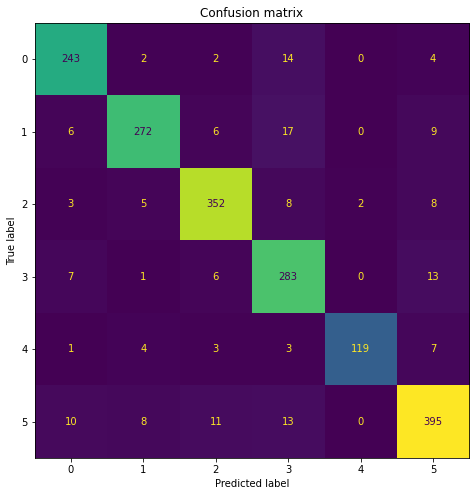

In [96]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm=metrics.confusion_matrix(test_targets,predictions)
plt.rcParams["figure.figsize"] = (8,8)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(colorbar=False)
plt.title("Confusion matrix")
plt.show()